# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [39]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Importing packages for statistics
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import os


In [3]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Loop through the columns to get column names and data types
for column in df.columns:
    print(column, df[column].dtype)

# Get unique values for each column
for column in df.columns:
    print(column, df[column].unique())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  
0       1.0  5.397605e-79     

In [5]:
# Previewing df shape
print(df.shape)

#Printing out the total number of rows and columns in the BRFSS dataset
n_rows, n_cols = df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

(445132, 326)
The number of rows in the dataset is 445132
The number of columns in the dataset is 326


In [6]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [7]:
# Previewing general information on dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), int64(5)
memory usage: 1.1 GB
None


Looking at the initial dataset information, this dataset contains 445132 entries with a total of 326 columns with datatypes being integers and floats. While there are some numerical columns, a good amount of the columns are categoricla/numerical. The many columns represent  various health-related risk behaviors, chronic health conditions, demographics, location, and even the use of preventive services along with other variables. I plan to narrow down the columns for the dataset, choosing the ones relevant for this analysis. 

In [8]:
#Selecting a subset of relevant columns out of the 326 variables in the data for exploratory analysis----------------------
col_selected = [ #Record Identification/ Demographics----------------------------------------------------------------------
            '_STATE', 'NUMADULT', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'WEIGHT2', 'WTKG3', 'HEIGHT3', 'HTIN4', 'HTM4', '_BMI5', '_BMI5CAT', '_RFBMI5', 
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'POORHLTH', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'PDIABTS1', 'PREDIAB2', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3', 'SMOKDAY2','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNK3GE5', 'DRNKANY6', '_RFBING6', '_DRNKWK2',
                #Social determinants/Health Equity 
            'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS',
            'SDHTRNSP', 'SDHSTRE1']

In [9]:
# Creating dataset of selected variables 
df_subset = df[col_selected].copy()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 67 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   NUMADULT  96032 non-null   float64
 2   _SEX      445132 non-null  float64
 3   _AGEG5YR  445132 non-null  float64
 4   _AGE80    445132 non-null  float64
 5   _AGE_G    445132 non-null  float64
 6   MARITAL   445124 non-null  float64
 7   _EDUCAG   445132 non-null  float64
 8   _INCOMG1  445132 non-null  float64
 9   VETERAN3  440959 non-null  float64
 10  EMPLOY1   438936 non-null  float64
 11  _CHLDCNT  445131 non-null  float64
 12  _METSTAT  435724 non-null  float64
 13  _URBSTAT  435724 non-null  float64
 14  _IMPRACE  445132 non-null  float64
 15  _RACE1    445130 non-null  float64
 16  _RACEPR1  445132 non-null  float64
 17  _HISPANC  445132 non-null  float64
 18  WEIGHT2   429231 non-null  float64
 19  WTKG3     403054 non-null  float64
 20  HEIG

In [10]:
#Previewing first 10 rows 
df_subset.head(10)


,_STATE,NUMADULT,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,WEIGHT2,WTKG3,HEIGHT3,HTIN4,HTM4,_BMI5,_BMI5CAT,_RFBMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,POORHLTH,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,PDIABTS1,PREDIAB2,DECIDE,_SMOKER3,SMOKDAY2,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNK3GE5,DRNKANY6,_RFBING6,_DRNKWK2,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1
0,1.0,2.0,2.0,13.0,80.0,6.0,1.0,4.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9999.0,NaN,9999.0,NaN,NaN,NaN,NaN,9.0,2.0,1.0,88.0,1.0,88.0,1.0,NaN,2.0,2.0,8.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,4.0,1.0,NaN,2.0,1.0,5.397605e-79,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0
1,1.0,2.0,2.0,13.0,80.0,6.0,3.0,2.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,150.0,6804.0,503.0,63.0,160.0,2657.0,3.0,2.0,1.0,1.0,88.0,1.0,88.0,1.0,NaN,2.0,2.0,6.0,1.0,2.0,8.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,NaN,2.0,1.0,5.397605e-79,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
2,1.0,1.0,2.0,8.0,56.0,5.0,1.0,4.0,6.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,140.0,6350.0,502.0,62.0,157.0,2561.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,NaN,2.0,1.0,5.397605e-79,2.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
3,1.0,3.0,2.0,14.0,73.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,140.0,6350.0,505.0,65.0,165.0,2330.0,2.0,1.0,1.0,1.0,88.0,1.0,88.0,1.0,NaN,1.0,1.0,7.0,9.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,NaN,NaN,2.0,2.0,2.0,1.0,3.0,1.0,1.0,NaN,2.0,1.0,5.397605e-79,1.0,1.0,3.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
4,1.0,2.0,2.0,5.0,43.0,3.0,1.0,3.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,119.0,5398.0,502.0,62.0,157.0,2177.0,2.0,1.0,4.0,2.0,2.0,2.0,88.0,1.0,88.0,1.0,1.0,9.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,88.0,1.0,1.0,1.400000e+02,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
5,1.0,1.0,1.0,13.0,80.0,6.0,1.0,2.0,9.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,187.0,8482.0,511.0,71.0,180.0,2608.0,3.0,2.0,5.0,2.0,1.0,2.0,88.0,1.0,88.0,2.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,NaN,2.0,1.0,5.397605e-79,2.0,2.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
6,1.0,1.0,2.0,13.0,80.0,6.0,2.0,4.0,5.0,2.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,138.0,6260.0,505.0,65.0,165.0,2296.0,2.0,1.0,2.0,1.0,88.0,1.0,88.0,1.0,NaN,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,3.0,3.0,1.0,3.0,1.0,1.0,88.0,1.0,1.0,2.330000e+02,1.0,1.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
7,1.0,1.0,2.0,13.0,80.0,6.0,3.0,2.0,5.0,2.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,162.0,7348.0,504.0,64.0,163.0,2781.0,3.0,2.0,3.0,1.0,88.0,1.0,88.0,1.0,NaN,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,NaN,2.0,1.0,5.397605e-79,1.0,1.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0
8,1.0,2.0,2.0,12.0,78.0,6.0,1.0,4.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9999.0,NaN,507.0,67.0,170.0,NaN,NaN,9.0,3.0,1.0,88.0,1.0,88.0,1.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,NaN,NaN,2.0,3.0,3.0,1.0,3.0,4.0,1.0,NaN,2.0,1.0,5.397605e-79,1.0,1.0,4.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0
9,1.0,2.0,2.0,11.0,72.0,6.0,1.0,4.0,5.0,2.0,7.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,180.0,8165.0,506.0,66.0,168.0,2905.0,3.0,2.0,3.0,1.0,1.0,2.0,88.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,2.0,4.0,NaN,2.0,3.0,1.0,1.0,88.0,1.0,1.0,2.300000e+01,1.0,1.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,4.0


In [11]:
#Computing percent missing values in each column in the dataset

percent_missing = ((df_subset.isnull() | df_subset.isna()).sum() * 100 / df_subset.index.size).round(2)
missing_value_df = pd.DataFrame({'column_name': df_subset.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_df

,column_name,percent_missing
_STATE,_STATE,0.00
NUMADULT,NUMADULT,78.43
_SEX,_SEX,0.00
_AGEG5YR,_AGEG5YR,0.00
_AGE80,_AGE80,0.00
_AGE_G,_AGE_G,0.00
MARITAL,MARITAL,0.00
_EDUCAG,_EDUCAG,0.00
_INCOMG1,_INCOMG1,0.00
VETERAN3,VETERAN3,0.94


In [13]:
#Inspecting unique values and value counts for all variables
for col in df_subset:
    print(f"{col} - unique values: ")
    print(df_subset[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
NUMADULT - unique values: 
[ 2.  1.  3.  4.  5. nan  6. 18.  7. 10.  9.  8. 11. 12. 15. 21. 17.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8. 14.  5. 12. 11. 10.  9.  7.  6.  4.  2.  3.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 73. 43. 78. 72. 57. 65. 70. 62. 63. 67. 79. 68. 66. 76. 74. 51.
 71. 61. 64. 60. 52. 69. 46. 58. 38. 77. 59. 54. 75. 35. 55. 45. 44. 50.
 47. 53. 40. 49. 28. 30. 48. 41. 42. 36. 31. 33. 27. 26. 29. 34. 20. 19.
 37. 25. 32. 18. 24. 23. 39. 22. 21.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------

In [14]:
# checking for null
pd.set_option('display.max_rows', 500)
print(df_subset.isna().sum())

_STATE           0
NUMADULT    349100
_SEX             0
_AGEG5YR         0
_AGE80           0
_AGE_G           0
MARITAL          8
_EDUCAG          0
_INCOMG1         0
VETERAN3      4173
EMPLOY1       6196
_CHLDCNT         1
_METSTAT      9408
_URBSTAT      9408
_IMPRACE         0
_RACE1           2
_RACEPR1         0
_HISPANC         0
WEIGHT2      15901
WTKG3        42078
HEIGHT3      17055
HTIN4        32476
HTM4         28652
_BMI5        48806
_BMI5CAT     48806
_RFBMI5          0
GENHLTH          3
_RFHLTH          0
PHYSHLTH         5
_PHYS14D         0
MENTHLTH         3
_MENT14D         0
POORHLTH    189386
EXERANY2         2
_TOTINDA         0
SLEPTIM1         3
_HLTHPLN         0
PERSDOC3         2
CHECKUP1         3
ADDEPEV3         7
HAVARTH4         3
_DRDXAR2      2633
_MICHD        5021
DIABETE4         3
PDIABTS1    304884
PREDIAB2    304910
DECIDE       20986
_SMOKER3         0
SMOKDAY2    281079
SMOKE100     31777
USENOW3      32600
ECIGNOW2     33579
_CURECI2    

Looping through the columns, we see that all columns are datatype float and that a fair amount of the columns do contain null values. With such a large dataset, the plan will be to drop all null values. 

In [15]:
# Dropping these columns due to them having over 40% missing data
df_dropped = df_subset.drop(columns= ["DRNK3GE5", "PDIABTS1", "PREDIAB2",
                                      "NUMADULT", "SMOKDAY2", "WEIGHT2", 
                                      "WTKG3", "HEIGHT3","HTIN4", "HTM4", 
                                      'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 
                                      'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 
                                      'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 
                                      'SDHSTRE1', 'POORHLTH'],  axis= 1 )
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGEG5YR  445132 non-null  float64
 3   _AGE80    445132 non-null  float64
 4   _AGE_G    445132 non-null  float64
 5   MARITAL   445124 non-null  float64
 6   _EDUCAG   445132 non-null  float64
 7   _INCOMG1  445132 non-null  float64
 8   VETERAN3  440959 non-null  float64
 9   EMPLOY1   438936 non-null  float64
 10  _CHLDCNT  445131 non-null  float64
 11  _METSTAT  435724 non-null  float64
 12  _URBSTAT  435724 non-null  float64
 13  _IMPRACE  445132 non-null  float64
 14  _RACE1    445130 non-null  float64
 15  _RACEPR1  445132 non-null  float64
 16  _HISPANC  445132 non-null  float64
 17  _BMI5     396326 non-null  float64
 18  _BMI5CAT  396326 non-null  float64
 19  _RFBMI5   445132 non-null  float64
 20  GENH

In [16]:
#Checking duplicates count

df_dropped.duplicated().sum()


12

In [17]:
# Dropping duplicate rows
df_dropped.drop_duplicates(inplace=True)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445120 entries, 0 to 445131
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445120 non-null  float64
 1   _SEX      445120 non-null  float64
 2   _AGEG5YR  445120 non-null  float64
 3   _AGE80    445120 non-null  float64
 4   _AGE_G    445120 non-null  float64
 5   MARITAL   445112 non-null  float64
 6   _EDUCAG   445120 non-null  float64
 7   _INCOMG1  445120 non-null  float64
 8   VETERAN3  440949 non-null  float64
 9   EMPLOY1   438926 non-null  float64
 10  _CHLDCNT  445119 non-null  float64
 11  _METSTAT  435712 non-null  float64
 12  _URBSTAT  435712 non-null  float64
 13  _IMPRACE  445120 non-null  float64
 14  _RACE1    445118 non-null  float64
 15  _RACEPR1  445120 non-null  float64
 16  _HISPANC  445120 non-null  float64
 17  _BMI5     396318 non-null  float64
 18  _BMI5CAT  396318 non-null  float64
 19  _RFBMI5   445120 non-null  float64
 20  GENHLTH  

In [18]:
# Dropping Null values
df_copy = df_dropped.dropna().copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368537 entries, 1 to 435825
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    368537 non-null  float64
 1   _SEX      368537 non-null  float64
 2   _AGEG5YR  368537 non-null  float64
 3   _AGE80    368537 non-null  float64
 4   _AGE_G    368537 non-null  float64
 5   MARITAL   368537 non-null  float64
 6   _EDUCAG   368537 non-null  float64
 7   _INCOMG1  368537 non-null  float64
 8   VETERAN3  368537 non-null  float64
 9   EMPLOY1   368537 non-null  float64
 10  _CHLDCNT  368537 non-null  float64
 11  _METSTAT  368537 non-null  float64
 12  _URBSTAT  368537 non-null  float64
 13  _IMPRACE  368537 non-null  float64
 14  _RACE1    368537 non-null  float64
 15  _RACEPR1  368537 non-null  float64
 16  _HISPANC  368537 non-null  float64
 17  _BMI5     368537 non-null  float64
 18  _BMI5CAT  368537 non-null  float64
 19  _RFBMI5   368537 non-null  float64
 20  GENHLTH  

In [19]:
#Inspecting unique values and value counts for all variables
for col in df_copy:
    print(f"{col} - unique values: ")
    print(df_copy[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8. 14.  5. 11. 10.  9. 12.  7.  6.  4.  3.  2.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 73. 43. 72. 57. 65. 70. 62. 63. 67. 79. 68. 78. 66. 76. 74. 51.
 71. 61. 64. 60. 52. 69. 46. 58. 38. 77. 54. 75. 59. 35. 55. 45. 44. 50.
 47. 53. 40. 49. 30. 48. 41. 42. 36. 31. 33. 27. 26. 29. 34. 20. 19. 37.
 25. 28. 18. 24. 23. 39. 22. 21. 32.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[3. 1. 2. 4. 5. 6. 9.] 

------------------------------------
_EDUCAG - unique values: 
[2. 4. 3. 1. 9.

Upon inspection of the codebook for the variables, certain variables will have placeholder values such as 9 or 99 and others. I plan to go through the vairables and element these placeholders values that are being used for missing values. 

In [20]:
# Dropping entries with placeholder values that are equal to 7777.0, 9999.0, 
# 77.0, 99.0, 9.0 as those are zero placeholders for certain columns 

# Dropping additional entries with placeholder values 
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 77.0]
df_copy = df_copy[df_copy["MENTHLTH"] != 99.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 77.0]
df_copy = df_copy[df_copy["PHYSHLTH"] != 99.0]
df_copy = df_copy[df_copy["_HLTHPLN"] != 9.0]
df_copy = df_copy[df_copy["_RFHLTH"] != 9.0]


# Dropping the rest of the placeholder values in columns
df_copy = df_copy[df_copy['_AGEG5YR'] != 14.0]
df_copy = df_copy[df_copy['MARITAL'] != 9.0]
df_copy = df_copy[df_copy['_EDUCAG'] != 9.0]
df_copy = df_copy[df_copy['_INCOMG1'] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 9.0]
df_copy = df_copy[df_copy["VETERAN3"] != 7.0]
df_copy = df_copy[df_copy["EMPLOY1"] != 9.0]
df_copy = df_copy[df_copy["_CHLDCNT"] != 9.0]
df_copy = df_copy[df_copy["_RACE1"] != 9.0]
df_copy = df_copy[df_copy["_HISPANC"] != 9.0]
df_copy = df_copy[df_copy["GENHLTH"] != 9.0]
df_copy = df_copy[df_copy["EXERANY2"] != 9.0]
df_copy = df_copy[df_copy["_TOTINDA"] != 9.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 77.0]
df_copy = df_copy[df_copy["SLEPTIM1"] != 99.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 7.0]
df_copy = df_copy[df_copy["PERSDOC3"] != 9.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 7.0]
df_copy = df_copy[df_copy["CHECKUP1"] != 9.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 7.0]
df_copy = df_copy[df_copy["ADDEPEV3"] != 9.0]
df_copy = df_copy[df_copy["DIABETE4"] != 7.0]
df_copy = df_copy[df_copy["DIABETE4"] != 9.0]
df_copy = df_copy[df_copy["DECIDE"] != 7.0]
df_copy = df_copy[df_copy["DECIDE"] != 9.0]
df_copy = df_copy[df_copy["_SMOKER3"] != 9.0]
df_copy = df_copy[df_copy["SMOKE100"] != 7.0]
df_copy = df_copy[df_copy["SMOKE100"] != 9.0]
df_copy = df_copy[df_copy["USENOW3"] != 7.0]
df_copy = df_copy[df_copy["USENOW3"] != 9.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 7.0]
df_copy = df_copy[df_copy["ECIGNOW2"] != 9.0]
df_copy = df_copy[df_copy["_CURECI2"] != 9.0]
df_copy = df_copy[df_copy["_RFBING6"] != 9.0]
df_copy = df_copy[df_copy["_DRNKWK2"] != 99900.0]



df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 264353 entries, 1 to 435823
Data columns (total 46 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    264353 non-null  float64
 1   _SEX      264353 non-null  float64
 2   _AGEG5YR  264353 non-null  float64
 3   _AGE80    264353 non-null  float64
 4   _AGE_G    264353 non-null  float64
 5   MARITAL   264353 non-null  float64
 6   _EDUCAG   264353 non-null  float64
 7   _INCOMG1  264353 non-null  float64
 8   VETERAN3  264353 non-null  float64
 9   EMPLOY1   264353 non-null  float64
 10  _CHLDCNT  264353 non-null  float64
 11  _METSTAT  264353 non-null  float64
 12  _URBSTAT  264353 non-null  float64
 13  _IMPRACE  264353 non-null  float64
 14  _RACE1    264353 non-null  float64
 15  _RACEPR1  264353 non-null  float64
 16  _HISPANC  264353 non-null  float64
 17  _BMI5     264353 non-null  float64
 18  _BMI5CAT  264353 non-null  float64
 19  _RFBMI5   264353 non-null  float64
 20  GENHLTH  

In [21]:
#Inspecting values to see if there are additional missing values or placeholders 
for col in df_copy:
    print(f"{col} - unique values: ")
    print(df_copy[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGEG5YR - unique values: 
[13.  8.  5. 11. 10.  9. 12.  7.  6.  4.  3.  2.  1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 43. 72. 57. 65. 63. 79. 68. 78. 73. 76. 74. 51. 71. 61. 60. 70.
 52. 67. 46. 64. 66. 62. 69. 38. 77. 54. 35. 55. 45. 75. 59. 44. 58. 50.
 47. 53. 40. 49. 41. 42. 48. 31. 36. 27. 30. 26. 29. 34. 20. 37. 33. 28.
 25. 24. 39. 22. 21. 23. 32. 19. 18.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[3. 1. 2. 4. 6. 5.] 

------------------------------------
_EDUCAG - unique values: 
[2. 4. 3. 1.] 

------

In [22]:
# Define a threshold for obesity and for overweight 
obesity_threshold = 30.0  # BMI greater than or equal to 30 is considered obese
overweight_threshold = 25.0  # BMI greater than or equal to 25 is considered overweight 

# Create a new column indicating whether each BMI value is obese or not
df_copy['Obese'] = (df_copy["_BMI5"] * 0.01) >= obesity_threshold
df_copy['Overweight'] = (df_copy["_BMI5"] * 0.01) >= overweight_threshold

# Convert boolean values to binary (1 for obese, 0 for not obese)
df_copy['Obese'] = df_copy['Obese'].astype(int)
df_copy['Overweight'] = df_copy['Overweight'].astype(int)

print(df_copy)

        _STATE  _SEX  _AGEG5YR  _AGE80  _AGE_G  MARITAL  _EDUCAG  _INCOMG1  \
1          1.0   2.0      13.0    80.0     6.0      3.0      2.0       3.0   
2          1.0   2.0       8.0    56.0     5.0      1.0      4.0       6.0   
4          1.0   2.0       5.0    43.0     3.0      1.0      3.0       3.0   
6          1.0   2.0      13.0    80.0     6.0      2.0      4.0       5.0   
7          1.0   2.0      13.0    80.0     6.0      3.0      2.0       5.0   
...        ...   ...       ...     ...     ...      ...      ...       ...   
435816    56.0   1.0       2.0    27.0     2.0      5.0      4.0       5.0   
435817    56.0   1.0      11.0    71.0     6.0      1.0      2.0       5.0   
435819    56.0   2.0       5.0    42.0     3.0      1.0      3.0       6.0   
435820    56.0   1.0      10.0    68.0     6.0      2.0      2.0       3.0   
435823    56.0   1.0       8.0    56.0     5.0      2.0      2.0       5.0   

        VETERAN3  EMPLOY1  _CHLDCNT  _METSTAT  _URBSTAT  _IMPRA

In [23]:
# Creating final clean dataset
df_clean = df_copy.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264353 entries, 1 to 435823
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      264353 non-null  float64
 1   _SEX        264353 non-null  float64
 2   _AGEG5YR    264353 non-null  float64
 3   _AGE80      264353 non-null  float64
 4   _AGE_G      264353 non-null  float64
 5   MARITAL     264353 non-null  float64
 6   _EDUCAG     264353 non-null  float64
 7   _INCOMG1    264353 non-null  float64
 8   VETERAN3    264353 non-null  float64
 9   EMPLOY1     264353 non-null  float64
 10  _CHLDCNT    264353 non-null  float64
 11  _METSTAT    264353 non-null  float64
 12  _URBSTAT    264353 non-null  float64
 13  _IMPRACE    264353 non-null  float64
 14  _RACE1      264353 non-null  float64
 15  _RACEPR1    264353 non-null  float64
 16  _HISPANC    264353 non-null  float64
 17  _BMI5       264353 non-null  float64
 18  _BMI5CAT    264353 non-null  float64
 19  _RFBMI5

The final cleaned dataset has 264,353 entries with 47 columns, The target variable for analysis is whether an individual has obesity or not. A new column ("is_obese") was created for this variable.

# Dataset now final 

In [24]:
# Generating basic descriptive statistics of the numerica variables of the dataset 
df_clean.describe()

,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,_BMI5,_BMI5CAT,_RFBMI5,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2,Obese,Overweight
count,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,264353.000000,2.643530e+05,264353.000000,264353.000000
mean,30.198345,1.508438,7.603916,54.829383,4.391791,2.264453,3.152690,4.557512,1.870454,3.615707,1.500872,1.276437,1.128763,1.608315,1.866134,1.767871,1.924257,2876.631901,3.039485,1.704891,2.512273,1.161182,58.100782,1.513355,56.489009,1.541715,1.216669,1.216669,7.013735,1.044505,1.543595,1.372653,1.783312,1.654988,1.654988,1.910370,2.742220,1.891437,3.383052,1.592333,2.949170,1.616933,1.053542,1.435372,1.158186,3.226654e+02,0.348496,0.704891
std,15.674000,0.499930,3.460165,17.160796,1.571483,1.680806,0.909191,1.573486,0.335804,2.850893,0.982841,0.447236,0.334939,1.347202,2.051486,1.771095,0.264588,652.059488,0.826894,0.456093,1.026961,0.367700,38.194469,0.708718,38.528817,0.719070,0.411976,0.411976,1.419989,0.206214,0.691139,0.891915,0.411989,0.475373,0.475373,0.285652,0.711173,0.311091,0.911588,0.491402,0.293952,1.167524,0.225112,0.495807,0.364916,8.581678e+02,0.476495,0.456093
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
25%,18.000000,1.000000,5.000000,41.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2433.000000,2.000000,1.000000,2.000000,1.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,0.000000,0.000000
50%,29.000000,2.000000,8.000000,57.000000,5.000000,1.000000,3.000000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2752.000000,3.000000,2.000000,2.000000,1.000000,88.000000,1.000000,88.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.700000e+01,0.000000,1.000000
75%,45.000000,2.000000,10.000000,69.000000,6.000000,3.000000,4.000000,6.000000,2.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3201.000000,4.000000,2.000000,3.000000,1.000000,88.000000,2.000000,88.000000,2.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.270000e+02,1.000000,1.000000
max,56.000000,2.000000,13.000000,80.000000,6.000000,6.000000,4.000000,7.000000,2.000000,8.000000,6.000000,2.000000,2.000000,6.000000,8.000000,7.000000,2.000000,9765.000000,4.000000,2.000000,5.000000,2.000000,88.000000,3.000000,88.000000,

# Visualization


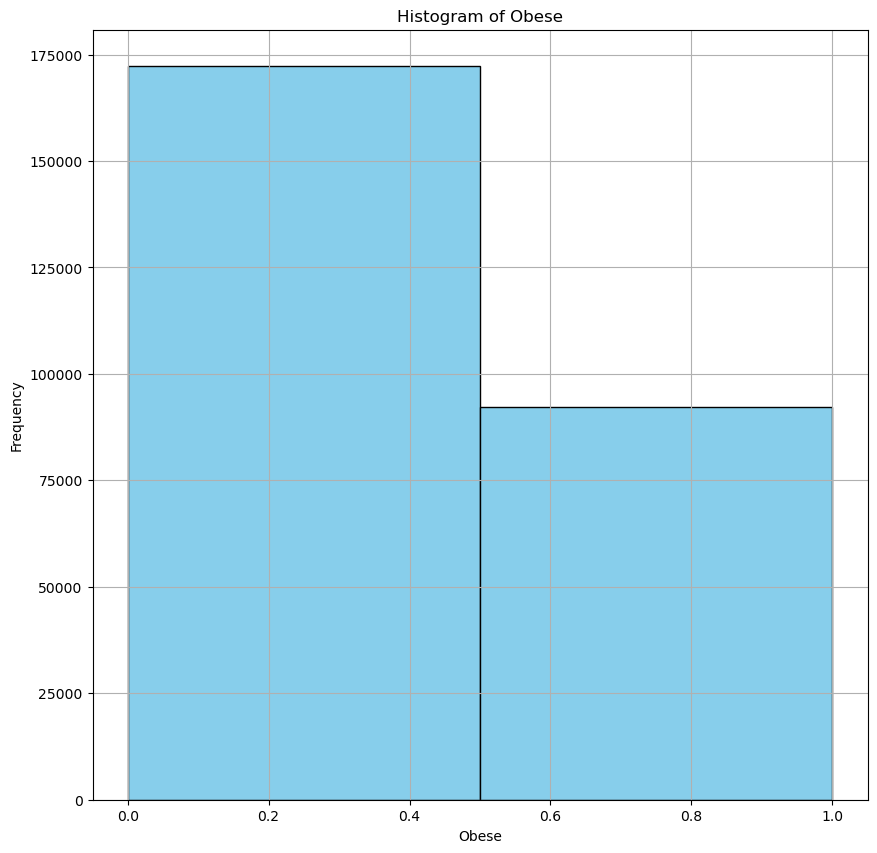

In [25]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = 'Obese'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

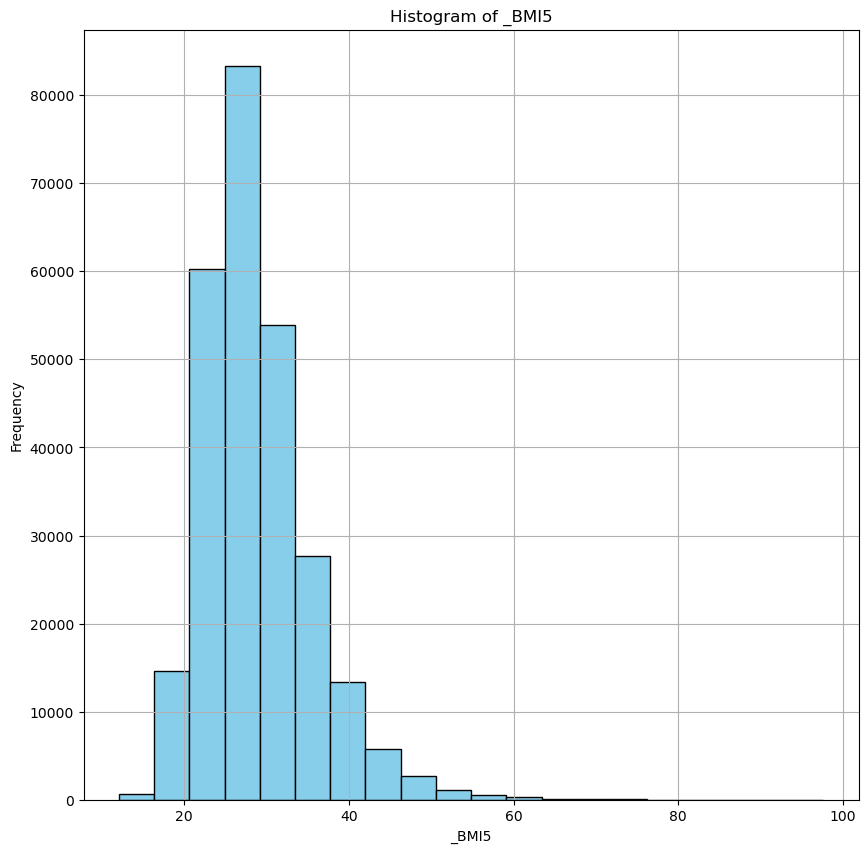

In [26]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = '_BMI5'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name] * 0.01), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

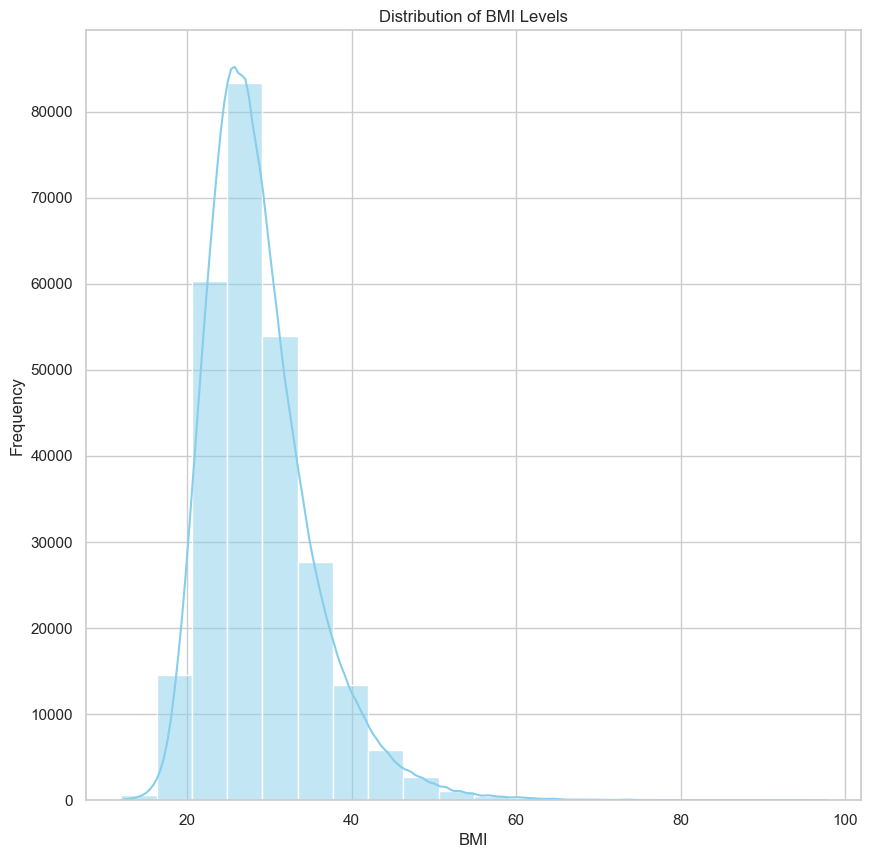

In [27]:
#Plotting a histogram to check the distribution of BMI values

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 10))
sns.histplot(data= (df_clean['_BMI5'] *.01), kde=True, color='skyblue', bins=20)

# Adding title and labels 
plt.title('Distribution of BMI Levels')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.show()

Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

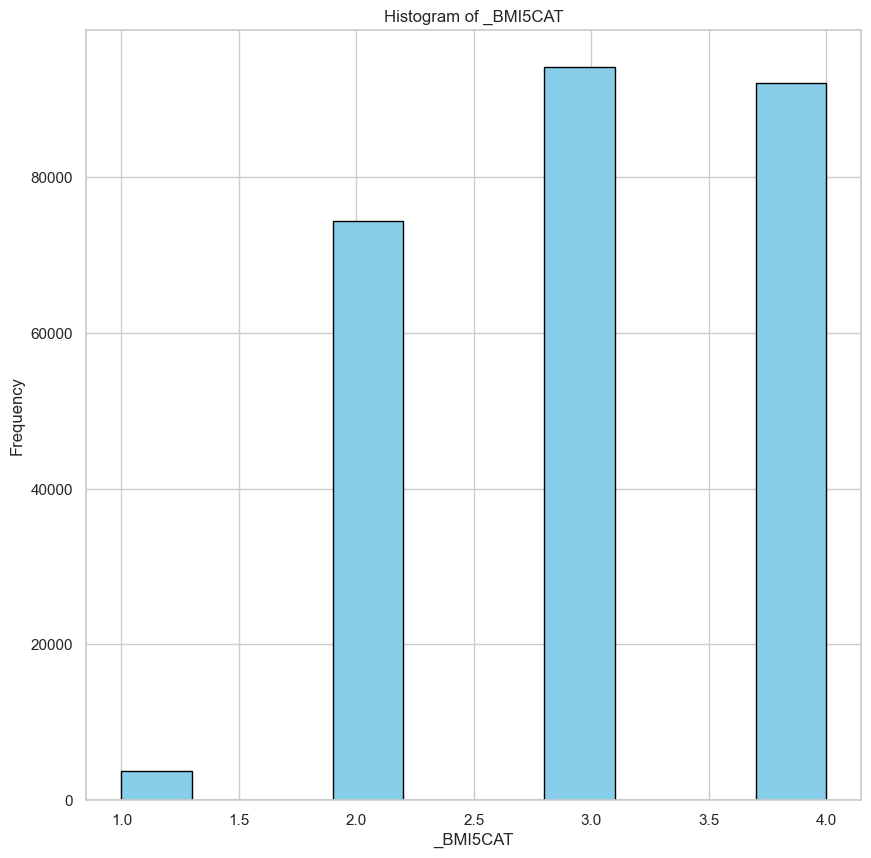

In [28]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = '_BMI5CAT'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()

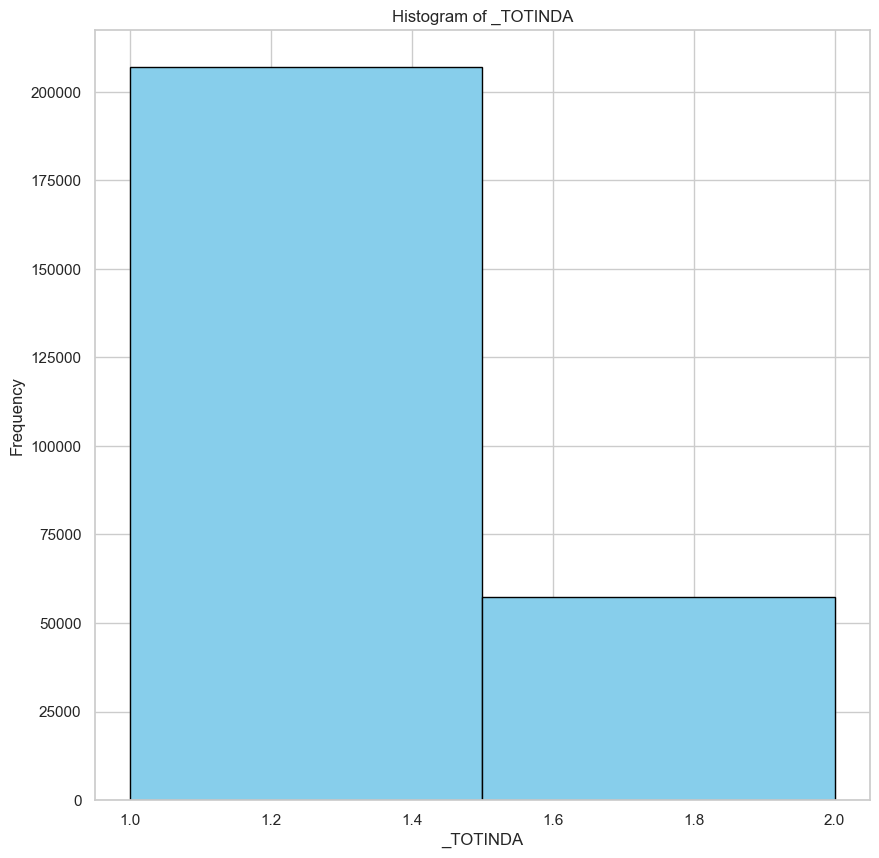

In [29]:
# Plotting Distributions for Exercise

import matplotlib.pyplot as plt

column_name = '_TOTINDA'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

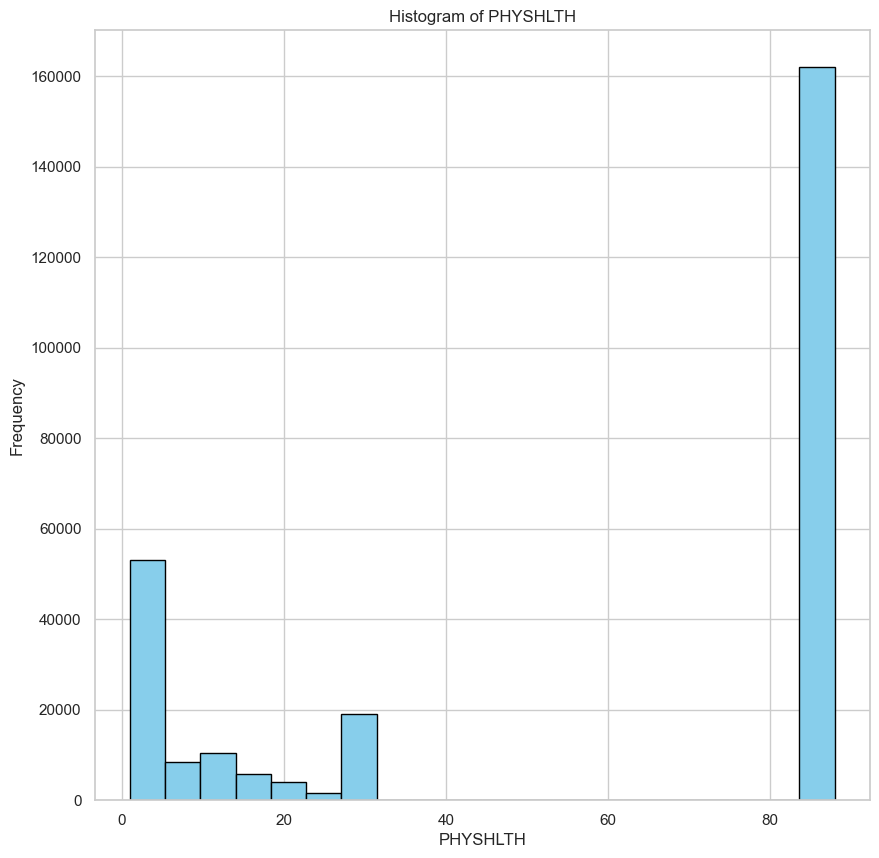

In [30]:
# Plotting Distributions for Physical health status

import matplotlib.pyplot as plt

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

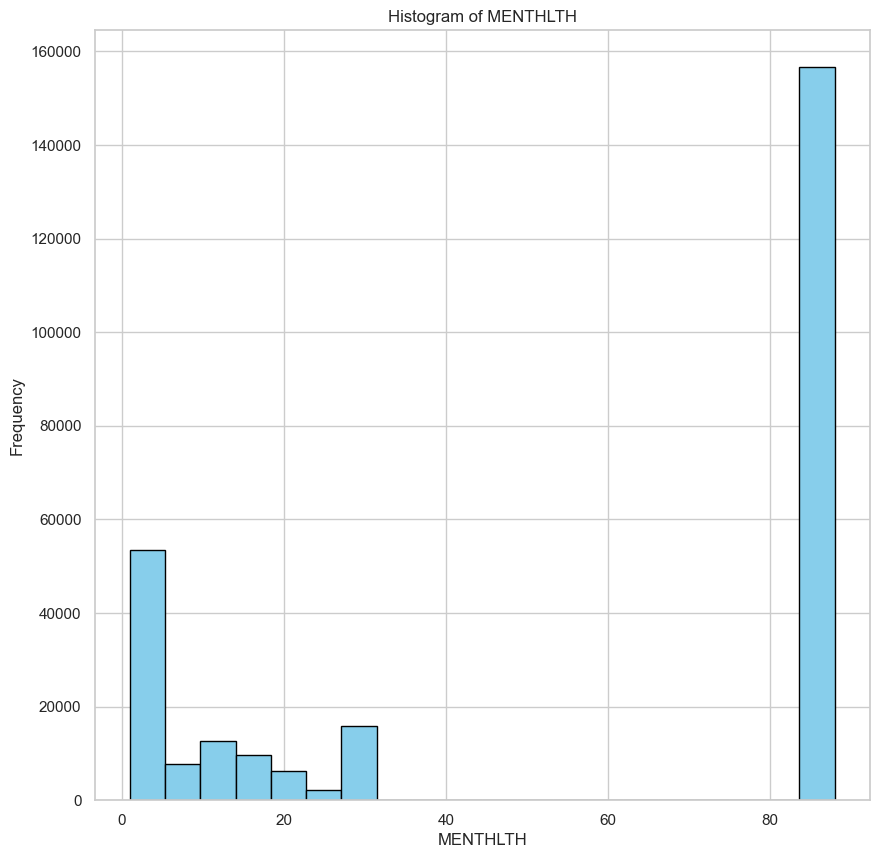

In [31]:
# Plotting Distributions for Mental health status

import matplotlib.pyplot as plt

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

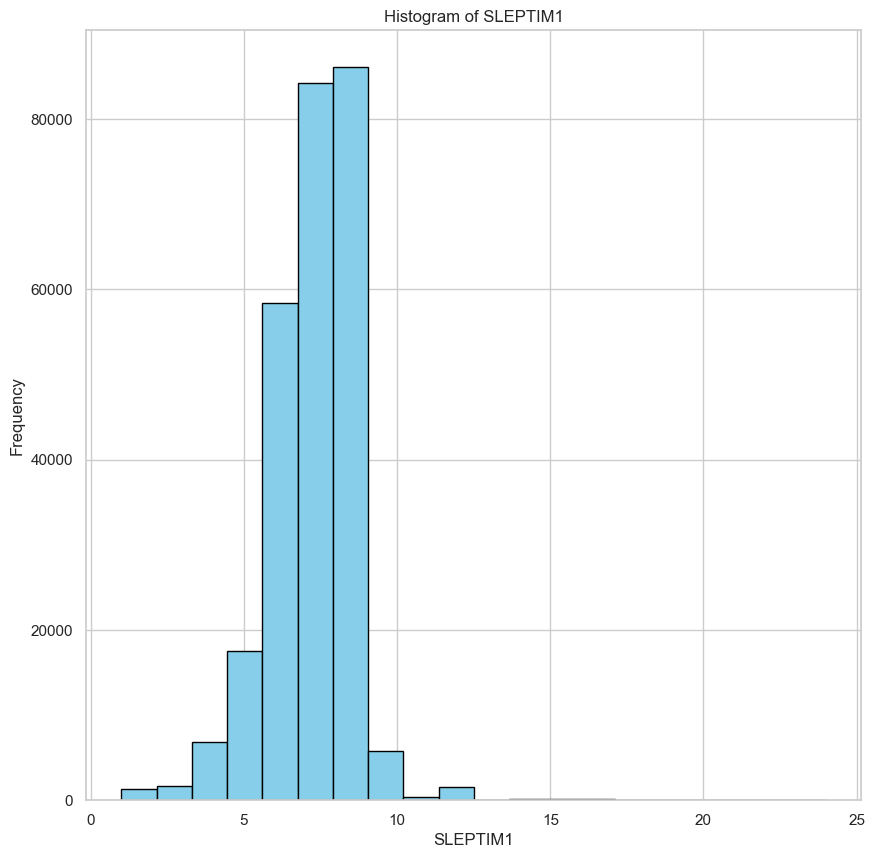

In [32]:
# Plotting Distributions for BMI

import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(10, 10))
plt.hist((df_clean[column_name]), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Overweight    1.000000
_RFBMI5       1.000000
_BMI5CAT      0.850253
_BMI5         0.641414
Obese         0.473229
GENHLTH       0.155759
_TOTINDA      0.088944
EXERANY2      0.088944
_RFHLTH       0.069887
_AGE_G        0.060762
_PHYS14D      0.047378
_AGE80        0.043945
_AGEG5YR      0.040182
DRNKANY6      0.032481
_METSTAT      0.030965
_URBSTAT      0.027864
_CHLDCNT      0.023144
MENTHLTH      0.022614
_IMPRACE      0.017604
_RACE1        0.013688
_STATE        0.012530
_RACEPR1      0.011974
_SMOKER3      0.003895
_RFBING6      0.001218
_MENT14D     -0.007407
_HLTHPLN     -0.008649
_INCOMG1     -0.009930
_DRNKWK2     -0.011877
DECIDE       -0.012700
ECIGNOW2     -0.013975
EMPLOY1      -0.016902
SMOKE100     -0.024935
_HISPANC     -0.025641
_CURECI2     -0.029808
PHYSHLTH     -0.034210
ADDEPEV3     -0.034213
PERSDOC3     -0.034952
USENOW3      -0.036352
SLEPTIM1     -0.039417
_MICHD       -0.047192
CHECKUP1     -0.048766
VETERAN3     -0.051678
_EDUCAG      -0.058568
MARITAL    

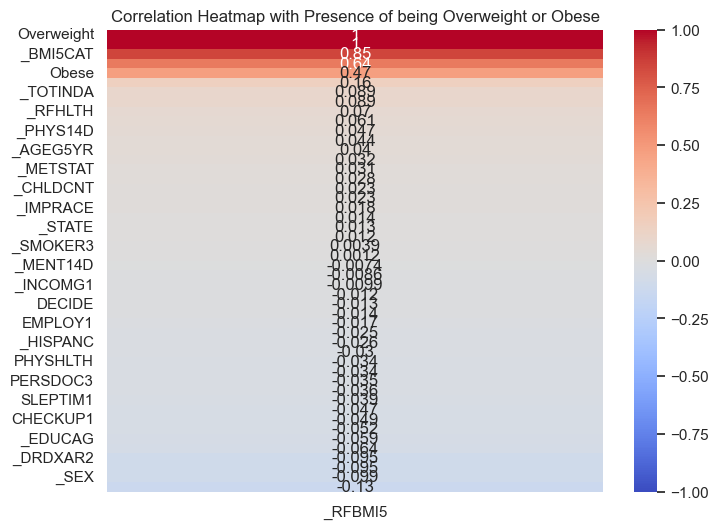

In [33]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["_RFBMI5"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['_RFBMI5']].sort_values(by='_RFBMI5', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Overweight or Obese')
plt.show()


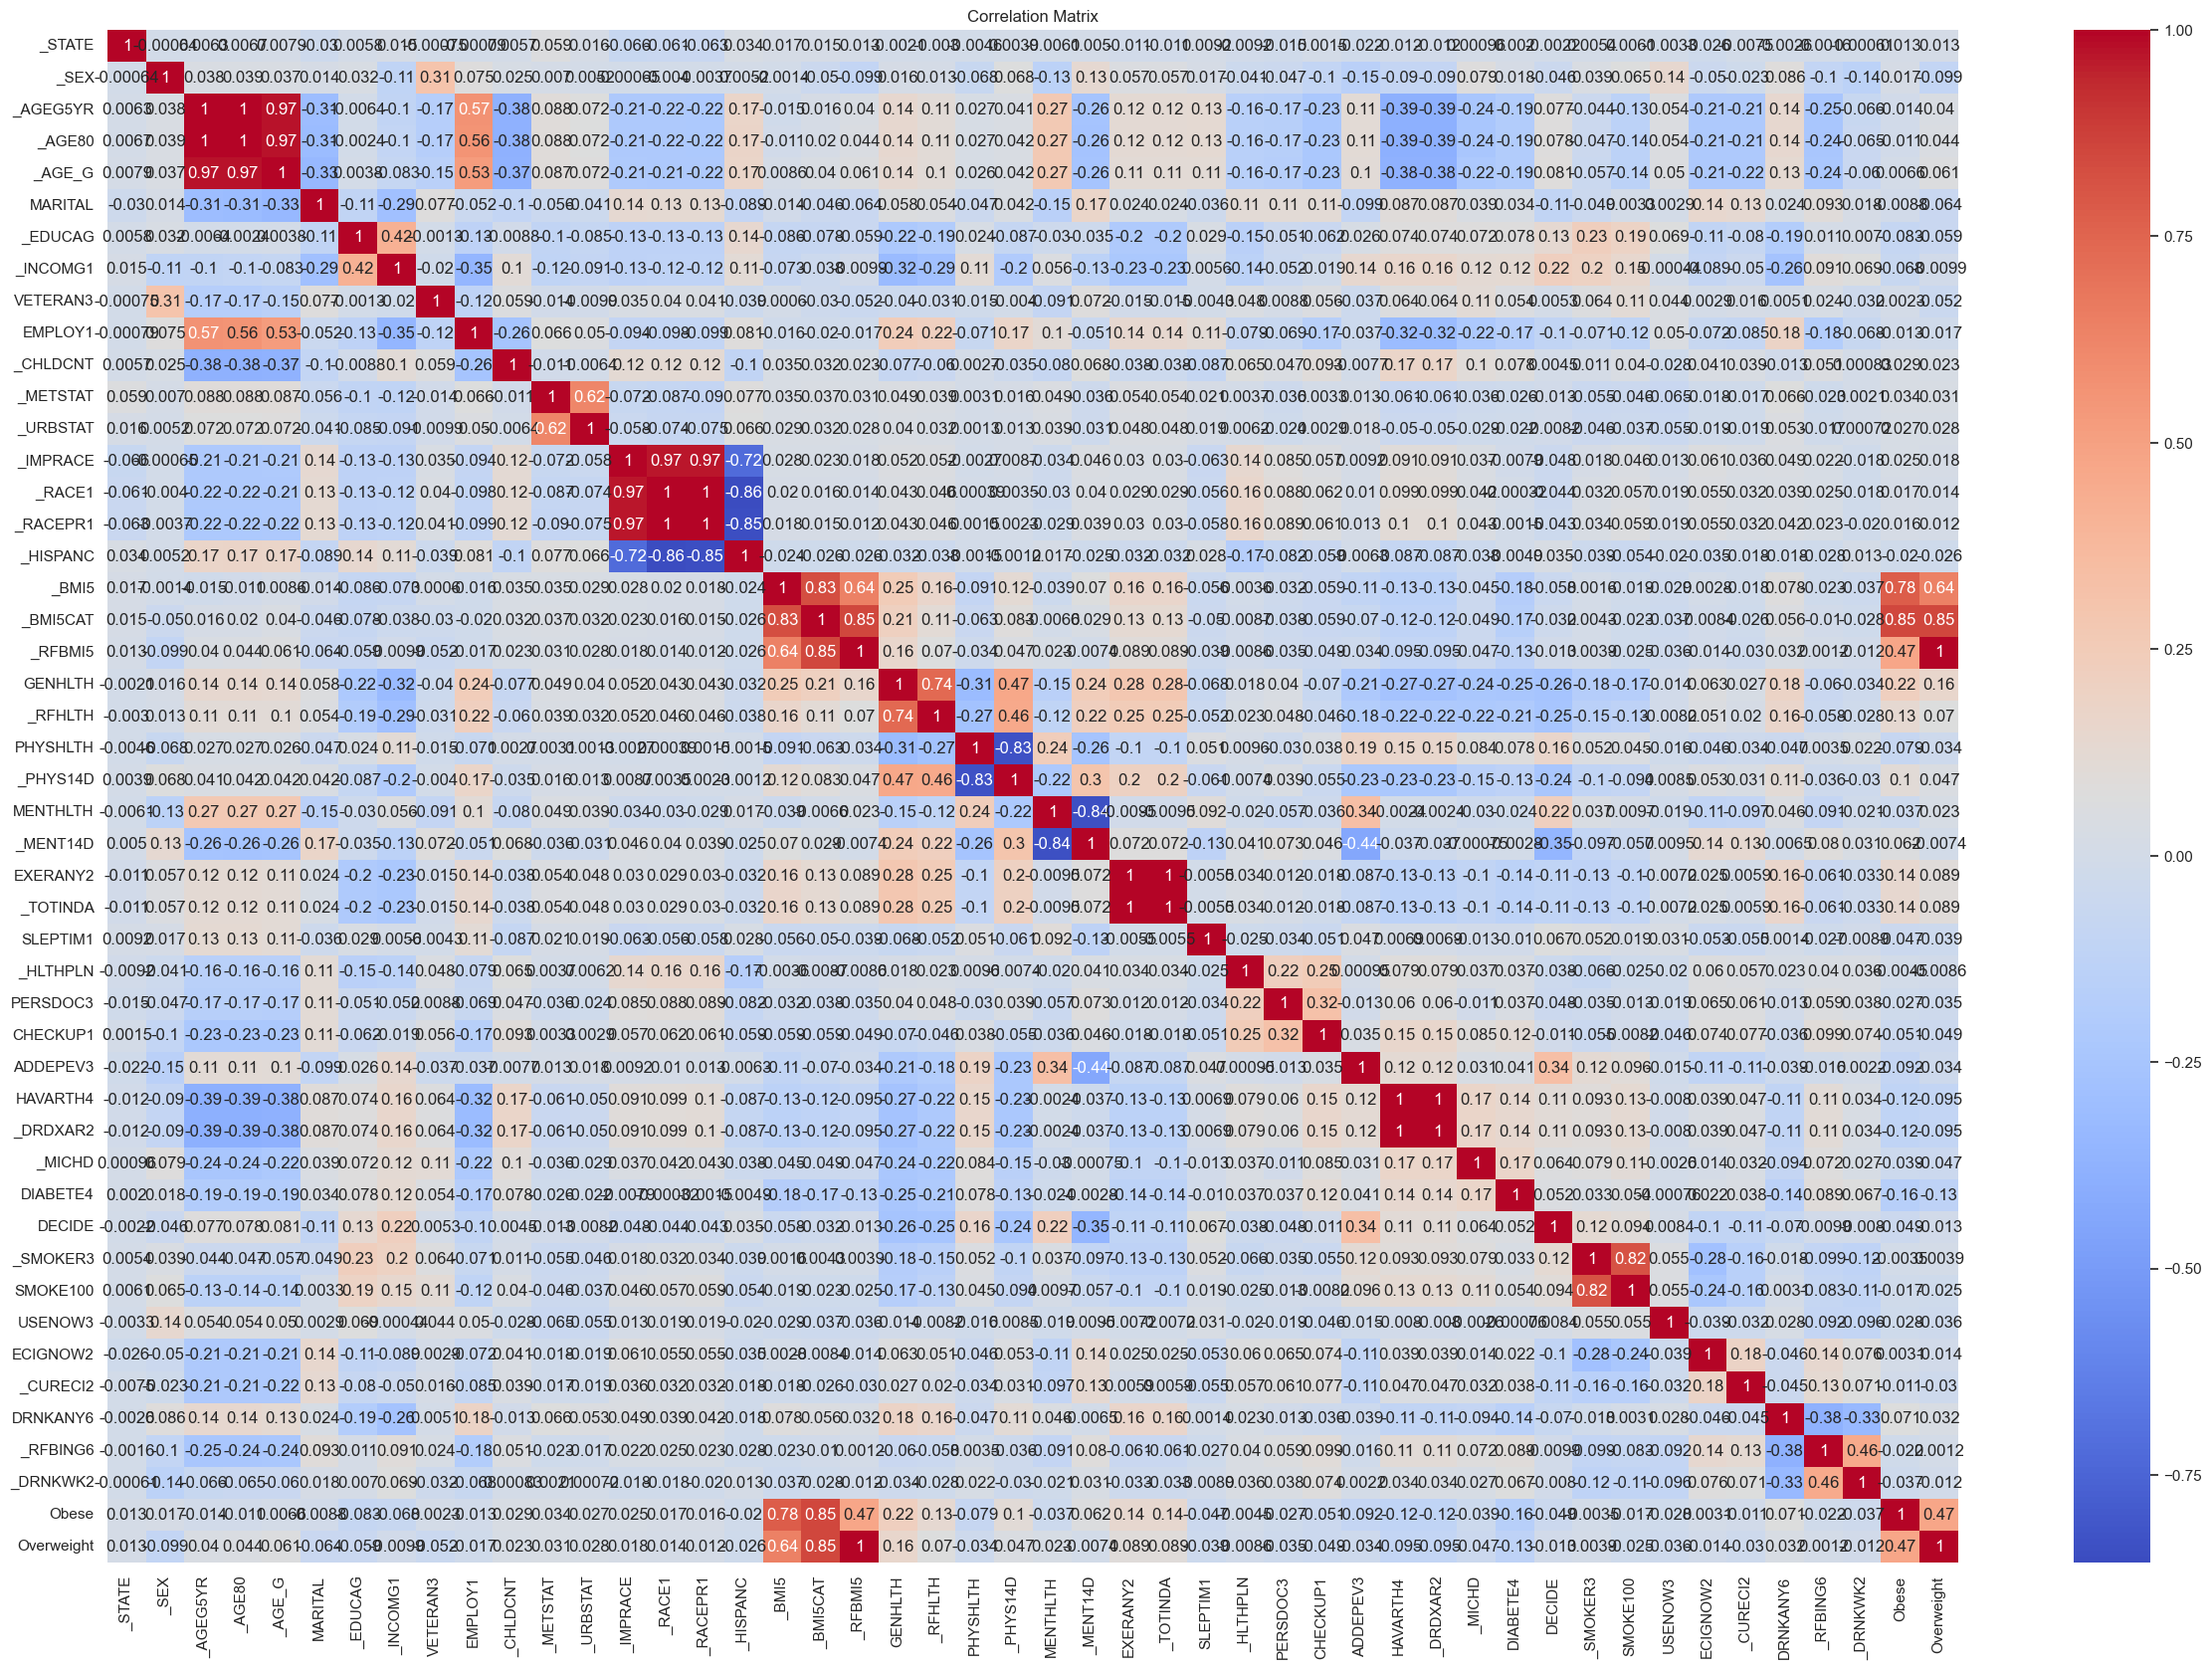

In [34]:
#Generating Correlation matrix
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Obese         1.000000
_BMI5CAT      0.849563
_BMI5         0.776388
Overweight    0.473229
_RFBMI5       0.473229
GENHLTH       0.223760
_TOTINDA      0.141833
EXERANY2      0.141833
_RFHLTH       0.134703
_PHYS14D      0.103164
DRNKANY6      0.071364
_MENT14D      0.062400
_METSTAT      0.034365
_CHLDCNT      0.028842
_URBSTAT      0.027176
_IMPRACE      0.024705
_RACE1        0.016991
_SEX          0.016923
_RACEPR1      0.015963
_STATE        0.012708
_AGE_G        0.006628
ECIGNOW2      0.003063
VETERAN3      0.002307
_SMOKER3     -0.003475
_HLTHPLN     -0.004545
MARITAL      -0.008837
_AGE80       -0.010777
_CURECI2     -0.010989
EMPLOY1      -0.012965
_AGEG5YR     -0.013840
SMOKE100     -0.017404
_HISPANC     -0.019595
_RFBING6     -0.021735
PERSDOC3     -0.027318
USENOW3      -0.027663
_DRNKWK2     -0.036668
MENTHLTH     -0.037480
_MICHD       -0.039180
SLEPTIM1     -0.047138
DECIDE       -0.049266
CHECKUP1     -0.051003
_INCOMG1     -0.067646
PHYSHLTH     -0.078881
_EDUCAG    

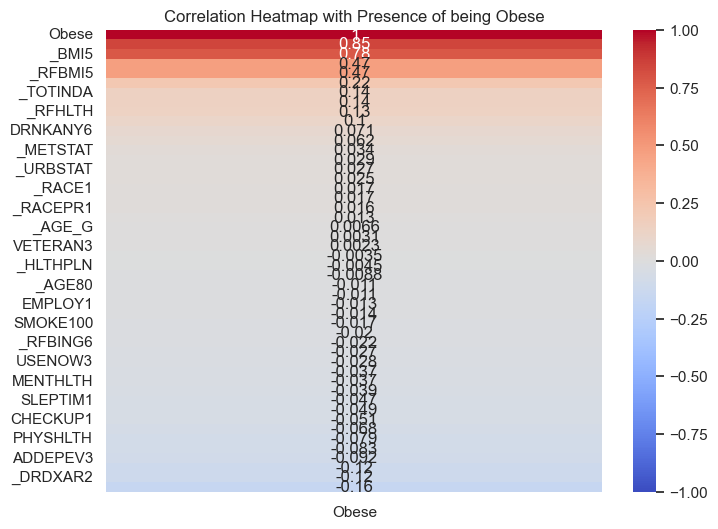

In [35]:
# Checking correlations between feature variables and BMI values 
print(df_clean.corr()["Obese"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr()[['Obese']].sort_values(by='Obese', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of being Obese')
plt.show()

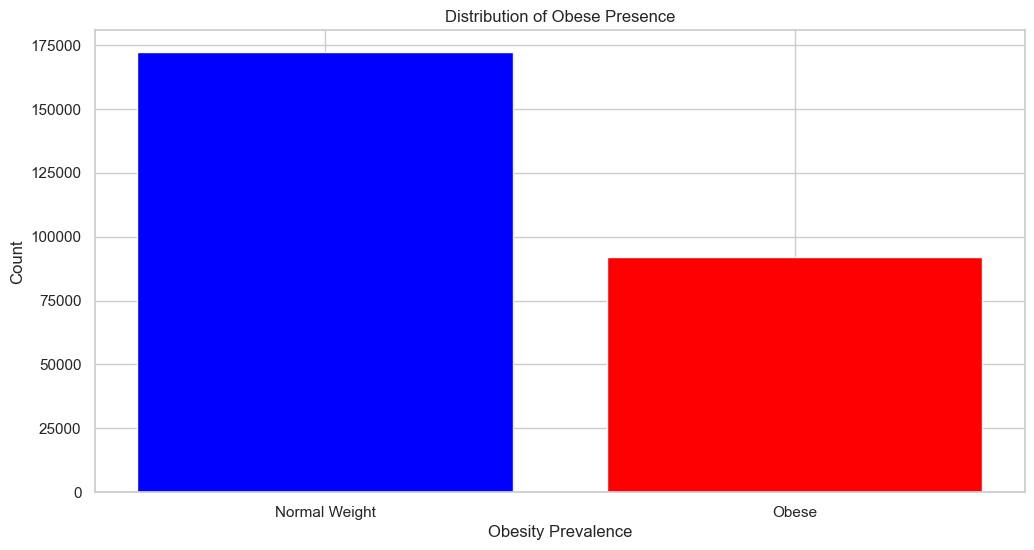

In [36]:
#Plotting visual for target variable

outcome_counts = df_clean['Obese'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['Normal Weight', 'Obese'])
plt.xlabel('Obesity Prevalence')
plt.ylabel('Count')
plt.title('Distribution of Obese Presence')
plt.show()

Upon observation of the distribution, it does seem to be skewed to the right. The majority of values seem to be between BMI values of 20 to 40. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

# Modeling

## Basic Logistic Regression Model 

#Spliting Data into train and test groups 
X = df_clean.drop(['_BMI5', '_BMI5CAT', 'Overweight', '_RFBMI5','Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling (optional for logistic regression, but can improve convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 6: Model Training
model = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence
model.fit(X_train_scaled, y_train)

#Step 7: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

#Additional evaluation metrics
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


#Splitting Data into train and test groups 
X = df_clean.drop(['_BMI5', '_BMI5CAT', 'Overweight', '_RFBMI5','Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initiating Standard Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Baseline Model Training
model = LogisticRegression(max_iter=1000)  # Increase max_iter for better convergence
model.fit(X_train_scaled, y_trai

#Baseline Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

In [37]:

# Splitting Data into train and test groups 
# Separating target variable from predictors
X = df_clean.drop(['_BMI5', '_BMI5CAT', 'Overweight', '_RFBMI5','Obese'], axis=1)  # Features
y = df_clean['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state = 42)
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,_STATE,_SEX,_AGEG5YR,_AGE80,_AGE_G,MARITAL,_EDUCAG,_INCOMG1,VETERAN3,EMPLOY1,_CHLDCNT,_METSTAT,_URBSTAT,_IMPRACE,_RACE1,_RACEPR1,_HISPANC,GENHLTH,_RFHLTH,PHYSHLTH,_PHYS14D,MENTHLTH,_MENT14D,EXERANY2,_TOTINDA,SLEPTIM1,_HLTHPLN,PERSDOC3,CHECKUP1,ADDEPEV3,HAVARTH4,_DRDXAR2,_MICHD,DIABETE4,DECIDE,_SMOKER3,SMOKE100,USENOW3,ECIGNOW2,_CURECI2,DRNKANY6,_RFBING6,_DRNKWK2
0,1.455902,1.010633,-0.178142,-0.109623,-0.260991,-0.760248,-0.155868,0.951414,0.398029,0.495087,2.599700,1.666161,2.682736,-0.453337,-0.421977,-0.433348,0.289209,0.418608,-0.472632,-1.359443,0.645147,-1.323975,0.613234,-0.571919,-0.571919,0.006226,-0.219252,-0.808008,1.960842,0.561098,-1.364977,-1.364977,0.331588,0.401842,0.367378,0.695222,0.856046,0.181141,-0.536306,-0.242517,1.113721,-0.436336,-0.361533
1,0.559710,-1.058625,-1.064356,-1.181697,-0.909698,-0.760248,-1.292358,0.298824,0.398029,-0.915242,2.599700,-0.646071,-0.401886,-0.453337,-0.421977,-0.433348,0.289209,-1.580012,-0.472632,0.805758,-0.745315,-0.675224,1.991290,1.882837,1.882837,-1.446736,-0.219252,-0.808008,0.771922,0.561098,0.776410,0.776410,0.331588,0.401842,0.367378,-0.446765,-1.245458,-6.847940,2.120889,-0.242517,-0.898563,-0.436336,-0.174241
2,-0.784578,1.010633,0.412667,0.485974,0.387716,-0.760248,-1.292358,0.298824,0.398029,0.495087,-0.526326,-0.646071,-0.401886,-0.453337,-0.421977,-0.433348,0.289209,-0.580702,-0.472632,0.805758,-0.745315,-1.349925,0.613234,-0.571919,-0.571919,-0.720255,-0.219252,-0.808008,-0.416998,-1.900892,0.776410,0.776410,0.331588,0.401842,0.367378,-0.446765,-1.245458,0.181141,-0.536306,-0.242517,-0.898563,-0.436336,-0.254673
3,1.327875,-1.058625,0.412667,0.307295,0.387716,-0.760248,-0.155868,0.951414,-2.697343,-0.915242,-0.526326,-0.646071,-0.401886,-0.453337,-0.421977,-0.433348,0.289209,-1.580012,-0.472632,0.805758,-0.745315,0.829877,-0.764822,-0.571919,-0.571919,0.006226,-0.219252,-0.808008,-0.416998,0.561098,0.776410,0.776410,0.331588,0.401842,0.367378,0.695222,0.856046,0.181141,-0.536306,-0.242517,-0.898563,-0.436336,-0.039805
4,1.583930,1.010633,-1.064356,-0.943458,-0.909698,-0.760248,-2.428847,-0.353766,0.398029,-0.915242,2.599700,1.666161,2.682736,2.558522,3.037610,3.004817,-3.557757,0.418608,-0.472632,0.805758,-0.745315,0.829877,-0.764822,-0.571919,-0.571919,0.006226,-0.219252,-0.808008,0.771922,0.561098,0.776410,0.776410,0.331588,-0.990808,0.367378,0.695222,0.856046,0.181141,-0.536306,-0.242517,1.113721,-0.436336,-0.361533


In [40]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)


# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

Baseline Training Score: 0.6506583622152293
Baseline Test Score: 0.6463845964706549
Cross Validation Scores: [0.64557352 0.64707162 0.64776044 0.65713198 0.65279968]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70     34309
           1       0.50      0.64      0.56     18562

    accuracy                           0.65     52871
   macro avg       0.63      0.65      0.63     52871
weighted avg       0.67      0.65      0.65     52871



In [41]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [42]:
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.6506583622152293
Model's Test Score: 0.6463845964706549
Cross Validation Scores: [0.64557352 0.64707162 0.64776044 0.65713198 0.65279968]
Model's Accuracy Score: 0.6463845964706549
Model's Precision Score: 0.4972006350798028
Model's F1 Score: 0.5600527108433735
Model's Recall Score: 0.641094709621808


## Decision Tree Classifier Model

In [43]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(X_train_scaled, y_train_resample)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

Decision Tree Training Score: 0.9999818732870256
Decision Tree  Test Score: 0.5982485672675001
Cross Validation Scores: [0.56514646 0.56729567 0.65878152 0.81684703 0.81592256]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     34309
           1       0.43      0.45      0.44     18562

    accuracy                           0.60     52871
   macro avg       0.56      0.57      0.56     52871
weighted avg       0.60      0.60      0.60     52871



In [44]:
# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9999818732870256
Model's Test Score: 0.5982485672675001
Cross Validation Scores: [0.56514646 0.56729567 0.65878152 0.81684703 0.81592256]
Model's Accuracy Score: 0.5982485672675001
Model's Precision Score: 0.4313815890579376
Model's F1 Score: 0.4422445710684557
Model's Recall Score: 0.45366878569119706


## K-Nearest Neighbors Model 

In [45]:
# Instantiate KNN Model 
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resample)
knn_y_pred = knn.predict(X_test_scaled)

# Knn Train Model Score
knn_train_score = knn.score(X_train_scaled, y_train_resample)

# Knn Test Model Score
knn_test_score = knn.score(X_test_scaled, y_test)


# Cross validating model
knn_cv = cross_val_score(knn, X_train_scaled, y_train_resample)


print("KNN Training Score:", knn_train_score)
print("KNN Test Score:", knn_test_score)
print("Cross Validation Scores:", knn_cv)


# Classification report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

KNN Training Score: 0.8088175582592555
KNN Test Score: 0.6046225719203344
Cross Validation Scores: [0.64363399 0.64201425 0.67384487 0.73774177 0.73460583]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68     34309
           1       0.45      0.53      0.49     18562

    accuracy                           0.60     52871
   macro avg       0.58      0.59      0.58     52871
weighted avg       0.62      0.60      0.61     52871



In [46]:
# Checking classification metrics
model_scores(knn, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8088175582592555
Model's Test Score: 0.6046225719203344
Cross Validation Scores: [0.64363399 0.64201425 0.67384487 0.73774177 0.73460583]
Model's Accuracy Score: 0.6046225719203344
Model's Precision Score: 0.44701357466063346
Model's F1 Score: 0.485908218975948
Model's Recall Score: 0.5322163559961212


## Random Forest Classifier Model 

In [47]:
# Random forest classifier model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train_resample)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(X_train_scaled, y_train_resample)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)

# Cross validating model
rfc_cv = cross_val_score(rfc, X_train_scaled, y_train_resample)


print("Random Forest Training Score:", rfc_train_score)
print("Random Forest Test Score:", rfc_test_score)
print("Cross Validation Scores:", rfc_cv)

# Classification report 
rfc_report = classification_report(y_test, y_rfc_pred)
print(rfc_report)


Random Forest Training Score: 0.9999746226018359
Random Forest Test Score: 0.693631669535284
Cross Validation Scores: [0.59578016 0.59691482 0.72079323 0.89838128 0.89843566]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     34309
           1       0.60      0.38      0.46     18562

    accuracy                           0.69     52871
   macro avg       0.66      0.62      0.62     52871
weighted avg       0.68      0.69      0.67     52871



In [48]:
# Checking classification metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9999746226018359
Model's Test Score: 0.693631669535284
Cross Validation Scores: [0.59578016 0.59691482 0.72079323 0.89838128 0.89843566]
Model's Accuracy Score: 0.693631669535284
Model's Precision Score: 0.6015289469163374
Model's F1 Score: 0.4637134154416634
Model's Recall Score: 0.3772761555866825


# Hyperparameter Tuning 
## Baseline Model Tuning 

In [49]:
# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(baseline_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test_scaled) 

Best Hyperparameters:  {'C': 1, 'max_iter': 4, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.6502523375869018


In [50]:
#Instantiate the model with tuned hyperparameters
tuned_baseline_model = LogisticRegression(random_state = 42, C = 1, penalty = 'l2',
                                          solver = 'liblinear', max_iter = 4 )

# Fit the model to the data
tb_model = tuned_baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_tuned_pred= tuned_baseline_model.predict(X_test_scaled)

# Baseline test score 
tuned_baseline_score = tuned_baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_baseline_train_score = tuned_baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_baseline_cv = cross_val_score(tuned_baseline_model, X_train_scaled, y_train_resample)


print("Tuned Baseline Training Score:", tuned_baseline_train_score)
print("Tuned Baseline Test Score:", tuned_baseline_score)
print("Tuned Cross Validation Scores:", tuned_baseline_cv)

Tuned Baseline Training Score: 0.6504408416595369
Tuned Baseline Test Score: 0.6463656825102608
Tuned Cross Validation Scores: [0.64646172 0.64678159 0.64848551 0.65684195 0.65269092]


In [51]:
# Classification metrics for tuned baseline model
model_scores(tuned_baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.6504408416595369
Model's Test Score: 0.6463656825102608
Cross Validation Scores: [0.64646172 0.64678159 0.64848551 0.65684195 0.65269092]
Model's Accuracy Score: 0.6463656825102608
Model's Precision Score: 0.4971704045273528
Model's F1 Score: 0.5592097508074592
Model's Recall Score: 0.6389397694213985


## Random Forest Tuning 

In [52]:
# Utilizing GridSearch to find best combination of parameters for the Random Forest Model

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples  
}

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  

Best Hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}
Best Score:  0.7285964640816198


In [53]:
#Instantiate the model with tuned hyperparameters
tuned_rfc = RandomForestClassifier(random_state = 42, bootstrap = True, max_depth = 10, 
                                   min_samples_leaf = 1, min_samples_split = 5, n_estimators = 5)

# Fit the model to the data
tuned_rfc.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, X_train_scaled, y_train_resample)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

Tuned Random Forest Training Score: 0.7546404385214402
Tuned Random Forest Test Score: 0.6873711486448147
Tuned Random Forest Cross Validation Scores: [0.59433005 0.58496928 0.70679935 0.87786177 0.87902188]


In [54]:
# Classification metrics for best rfc model
model_scores(tuned_rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.7546404385214402
Model's Test Score: 0.6873711486448147
Cross Validation Scores: [0.59433005 0.58496928 0.70679935 0.87786177 0.87902188]
Model's Accuracy Score: 0.6873711486448147
Model's Precision Score: 0.5760113661855979
Model's F1 Score: 0.48241741036480357
Model's Recall Score: 0.41498760909384763
